In [1]:
from itertools import chain
from pathlib import Path


def convert(path):
    f = open(path)
    name_file = Path(f.name).stem

    name_file = name_file.replace('DecisionTreeClassifier','DT').replace('XGBClassifier','XB').replace('RandomForestClassifier','RF')\
    .replace('ExtraTreesClassifier','ET').replace('X_','').replace('A_','').replace('mRMR_','').replace('_X','_100')


    data_algo = name_file.split('__')
    final_name = f'{data_algo[0]}_{data_algo[1]}'


    data = json.load(f)

    mccs = data['mean_test_MCC']
    kappass = data['mean_test_Kappa']
    params = data['params']
    zipSorted=sorted(zip(mccs,kappass, params),key = lambda t: t[0],reverse=True)
    my_dict=params
    my_data=[]
    for mcc, kappa, param in zipSorted:
        score={"Algo":final_name ,'MCC':mcc , 'Kappa':kappa }
        my_data_tmp =  dict(chain.from_iterable(d.items() for d in (score, param)))
        my_data.append(my_data_tmp)
    return final_name , pd.DataFrame(data=my_data)

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
mypath = "result_multi_ton"
my_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:

my_files

['DecisionTreeClassifier__X.json',
 'DecisionTreeClassifier__X_A_mRMR_20.json',
 'DecisionTreeClassifier__X_A_mRMR_40.json',
 'DecisionTreeClassifier__X_A_mRMR_60.json',
 'ExtraTreesClassifier__X.json',
 'ExtraTreesClassifier__X_A_mRMR_20.json',
 'ExtraTreesClassifier__X_A_mRMR_40.json',
 'ExtraTreesClassifier__X_A_mRMR_60.json',
 'MLP__X.json',
 'MLP__X_A_mRMR_20.json',
 'MLP__X_A_mRMR_40.json',
 'MLP__X_A_mRMR_60.json',
 'RandomForestClassifier__X.json',
 'RandomForestClassifier__X_A_mRMR_20.json',
 'RandomForestClassifier__X_A_mRMR_40.json',
 'RandomForestClassifier__X_A_mRMR_60.json',
 'XGBClassifier__X_A_mRMR_20.json',
 'XGBClassifier__X_A_mRMR_40.json']

In [5]:
import json
import pandas as pd

my_result_mean = {}
for f in my_files:
  path_file = join(mypath, f)
  k,v = convert(path_file)
  my_result_mean[k] = v

In [6]:
my_result_mean.keys()

dict_keys(['DT_100', 'DT_20', 'DT_40', 'DT_60', 'ET_100', 'ET_20', 'ET_40', 'ET_60', 'MLP_100', 'MLP_20', 'MLP_40', 'MLP_60', 'RF_100', 'RF_20', 'RF_40', 'RF_60', 'XB_20', 'XB_40'])

In [7]:
def bourda_count(my_data_borda):
  rank_points = my_data_borda[['MCC',  'Kappa']].values.argsort(axis=0).argsort(axis=0)

  borda_counts = rank_points.sum(axis=1)

  my_data_borda['Borda'] = borda_counts
  sorted_scores = my_data_borda.sort_values(by=['Borda', 'MCC'], ascending=False)

  return sorted_scores

In [8]:
my_result_mean.keys()

dict_keys(['DT_100', 'DT_20', 'DT_40', 'DT_60', 'ET_100', 'ET_20', 'ET_40', 'ET_60', 'MLP_100', 'MLP_20', 'MLP_40', 'MLP_60', 'RF_100', 'RF_20', 'RF_40', 'RF_60', 'XB_20', 'XB_40'])

In [9]:
my_result_mean['DT_40']

,Algo,MCC,Kappa,max_depth
0,DT_40,0.881348,0.879376,28
1,DT_40,0.881307,0.879337,36
2,DT_40,0.881306,0.879337,42
3,DT_40,0.881044,0.879042,20
4,DT_40,0.871948,0.869813,12
5,DT_40,0.715098,0.710631,4


In [10]:
my_result_mean.keys()

dict_keys(['DT_100', 'DT_20', 'DT_40', 'DT_60', 'ET_100', 'ET_20', 'ET_40', 'ET_60', 'MLP_100', 'MLP_20', 'MLP_40', 'MLP_60', 'RF_100', 'RF_20', 'RF_40', 'RF_60', 'XB_20', 'XB_40'])

In [11]:
# List of keys to keep
keys_to_keep = ['DT_20', 'DT_40', 'DT_60', 'DT_100']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values(['max_depth']) for key in keys_to_keep if key in my_result_mean}


depth_4 =[filtered_dict[key].MCC.values[filtered_dict[key].max_depth==4] for key  in filtered_dict.keys()]
depth_12 =[filtered_dict[key].MCC.values[filtered_dict[key].max_depth==12] for key  in filtered_dict.keys()]
depth_20 =[filtered_dict[key].MCC.values[filtered_dict[key].max_depth==20] for key  in filtered_dict.keys()]
depth_28 =[filtered_dict[key].MCC.values[filtered_dict[key].max_depth==28] for key  in filtered_dict.keys()]
depth_36 =[filtered_dict[key].MCC.values[filtered_dict[key].max_depth==36] for key  in filtered_dict.keys()]
depth_42 =[filtered_dict[key].MCC.values[filtered_dict[key].max_depth==42] for key  in filtered_dict.keys()]

depth_4_values = [float("{:.3f}".format(val[0])) for val in depth_4]
depth_12_values = [float("{:.3f}".format(val[0])) for val in depth_12]
depth_20_values = [float("{:.3f}".format(val[0])) for val in depth_20]
depth_28_values = [float("{:.3f}".format(val[0])) for val in depth_28]
depth_36_values = [float("{:.3f}".format(val[0])) for val in depth_36]
depth_42_values = [float("{:.3f}".format(val[0])) for val in depth_42]

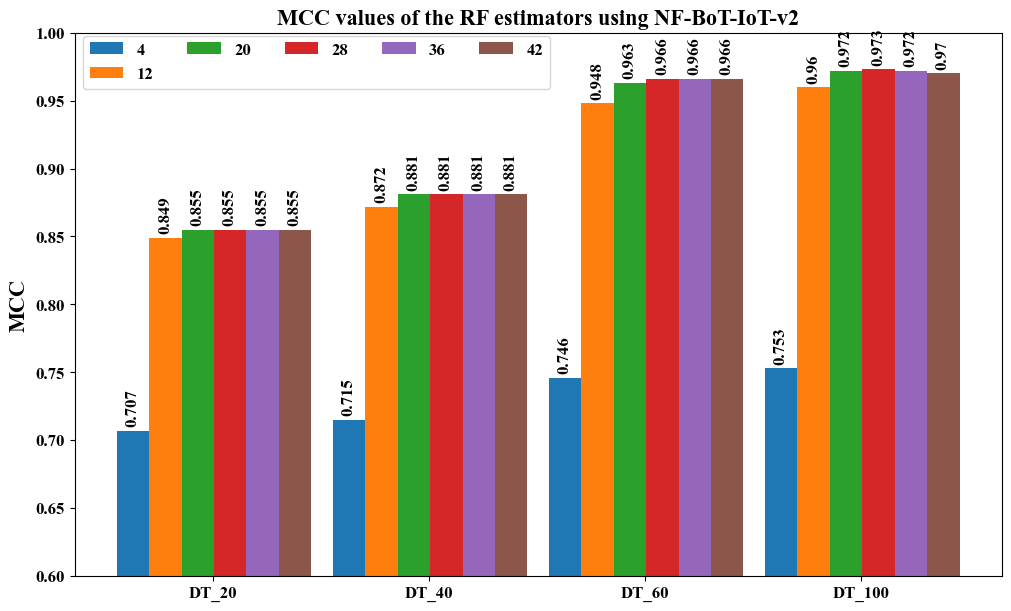

In [12]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('DT_20', 'DT_40', 'DT_60', 'DT_100')
penguin_means = {
    '4': depth_4_values,
    '12': depth_12_values,
    '20': depth_20_values,
    '28': depth_28_values,
    '36': depth_36_values,
    '42': depth_42_values
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.22, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0.6, 1)

plt.show()

In [13]:
my_result_mean['ET_20']

,Algo,MCC,Kappa,max_depth,n_estimators
0,ET_20,0.772901,0.766206,16,6
1,ET_20,0.767835,0.760849,16,4
2,ET_20,0.763357,0.756936,16,2
3,ET_20,0.593040,0.573418,8,6
4,ET_20,0.589526,0.570875,8,4
5,ET_20,0.520317,0.490705,8,2


In [23]:
# List of keys to keep
keys_to_keep = ['ET_20', 'ET_40', 'ET_60', 'ET_100']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values(['n_estimators','max_depth']) for key in keys_to_keep if key in my_result_mean}


D_8_E_2 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 2), 'MCC'].values for key  in filtered_dict.keys()]
D_8_E_4 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 4), 'MCC'].values for key  in filtered_dict.keys()]
D_8_E_6 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 6), 'MCC'].values for key  in filtered_dict.keys()]

D_16_E_2 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 2), 'MCC'].values for key  in filtered_dict.keys()]
D_16_E_4 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 4), 'MCC'].values for key  in filtered_dict.keys()]
D_16_E_6 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 6), 'MCC'].values for key  in filtered_dict.keys()]

D_8_E_2_values = [float("{:.3f}".format(val[0])) for val in D_8_E_2]
D_8_E_4_values = [float("{:.3f}".format(val[0])) for val in D_8_E_4]
D_8_E_6_values = [float("{:.3f}".format(val[0])) for val in D_8_E_6]
D_16_E_2_values = [float("{:.3f}".format(val[0])) for val in D_16_E_2]
D_16_E_4_values = [float("{:.3f}".format(val[0])) for val in D_16_E_4]
D_16_E_6_values = [float("{:.3f}".format(val[0])) for val in D_16_E_6]

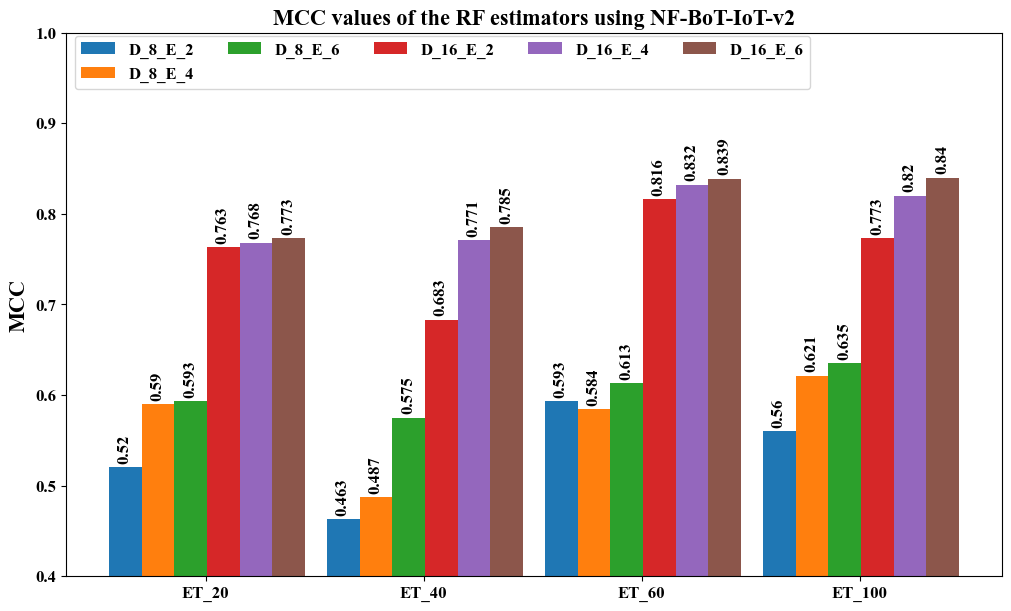

In [31]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('ET_20', 'ET_40', 'ET_60', 'ET_100')
penguin_means = {
    'D_8_E_2': D_8_E_2_values,
    'D_8_E_4': D_8_E_4_values,
    'D_8_E_6': D_8_E_6_values,
    'D_16_E_2': D_16_E_2_values,
    'D_16_E_4': D_16_E_4_values,
    'D_16_E_6': D_16_E_6_values
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.22, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0.4, 1)

plt.show()

### XGB

In [ ]:
# List of keys to keep
keys_to_keep = ['XB_20', 'XB_40', 'XB_60', 'XB_100']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values(['n_estimators','max_depth']) for key in keys_to_keep if key in my_result_mean}


D_8_E_2 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 2), 'MCC'].values for key  in filtered_dict.keys()]
D_8_E_4 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 4), 'MCC'].values for key  in filtered_dict.keys()]
D_8_E_6 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 6), 'MCC'].values for key  in filtered_dict.keys()]

D_16_E_2 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 2), 'MCC'].values for key  in filtered_dict.keys()]
D_16_E_4 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 4), 'MCC'].values for key  in filtered_dict.keys()]
D_16_E_6 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 6), 'MCC'].values for key  in filtered_dict.keys()]

D_8_E_2_values = [float("{:.3f}".format(val[0])) for val in D_8_E_2]
D_8_E_4_values = [float("{:.3f}".format(val[0])) for val in D_8_E_4]
D_8_E_6_values = [float("{:.3f}".format(val[0])) for val in D_8_E_6]
D_16_E_2_values = [float("{:.3f}".format(val[0])) for val in D_16_E_2]
D_16_E_4_values = [float("{:.3f}".format(val[0])) for val in D_16_E_4]
D_16_E_6_values = [float("{:.3f}".format(val[0])) for val in D_16_E_6]

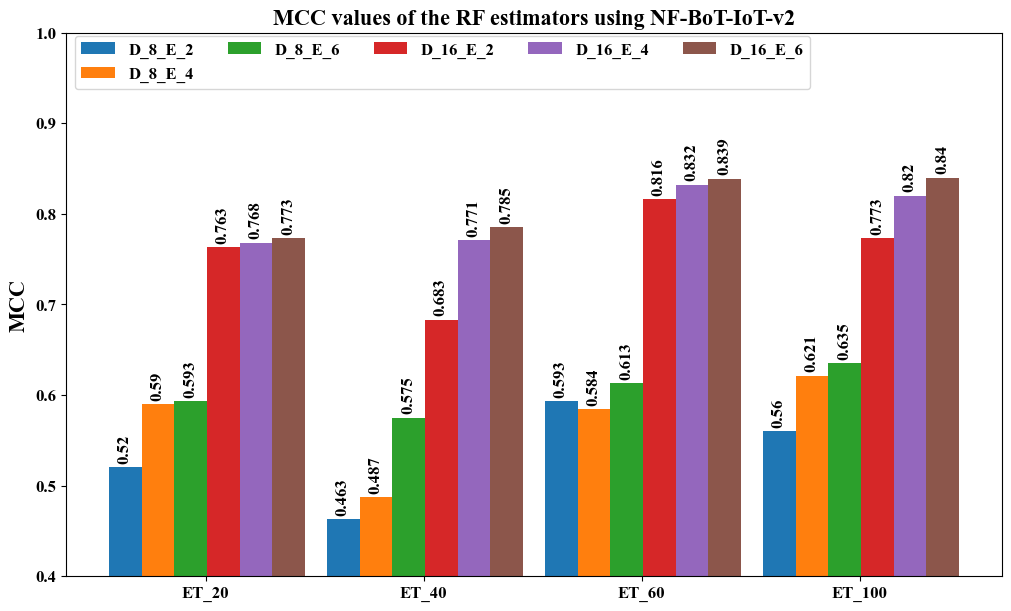

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('XB_20', 'XB_40', 'XB_60', 'XB_100')
penguin_means = {
    'D_8_E_2': D_8_E_2_values,
    'D_8_E_4': D_8_E_4_values,
    'D_8_E_6': D_8_E_6_values,
    'D_16_E_2': D_16_E_2_values,
    'D_16_E_4': D_16_E_4_values,
    'D_16_E_6': D_16_E_6_values
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.22, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0.4, 1)

plt.show()

### RF

In [ ]:
# List of keys to keep
keys_to_keep = ['RF_20', 'RF_40', 'RF_60', 'RF_100']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values(['n_estimators','max_depth']) for key in keys_to_keep if key in my_result_mean}


D_8_E_2 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 2), 'MCC'].values for key  in filtered_dict.keys()]
D_8_E_4 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 4), 'MCC'].values for key  in filtered_dict.keys()]
D_8_E_6 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 8) & (filtered_dict[key]['n_estimators'] == 6), 'MCC'].values for key  in filtered_dict.keys()]

D_16_E_2 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 2), 'MCC'].values for key  in filtered_dict.keys()]
D_16_E_4 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 4), 'MCC'].values for key  in filtered_dict.keys()]
D_16_E_6 =[filtered_dict[key].loc[(filtered_dict[key]['max_depth'] == 16) & (filtered_dict[key]['n_estimators'] == 6), 'MCC'].values for key  in filtered_dict.keys()]

D_8_E_2_values = [float("{:.3f}".format(val[0])) for val in D_8_E_2]
D_8_E_4_values = [float("{:.3f}".format(val[0])) for val in D_8_E_4]
D_8_E_6_values = [float("{:.3f}".format(val[0])) for val in D_8_E_6]
D_16_E_2_values = [float("{:.3f}".format(val[0])) for val in D_16_E_2]
D_16_E_4_values = [float("{:.3f}".format(val[0])) for val in D_16_E_4]
D_16_E_6_values = [float("{:.3f}".format(val[0])) for val in D_16_E_6]

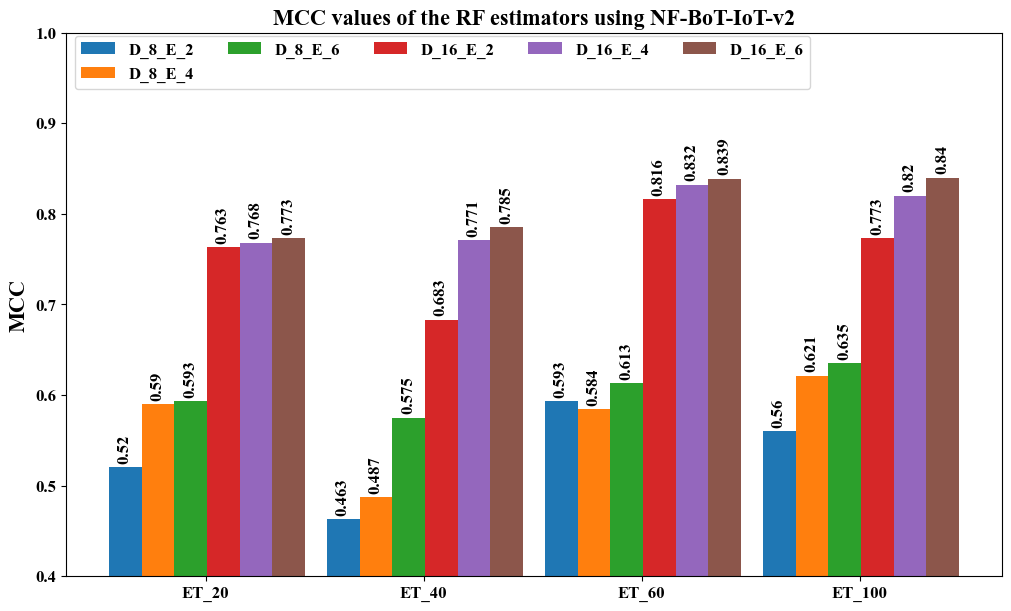

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('RF_20', 'RF_40', 'RF_60', 'RF_100')
penguin_means = {
    'D_8_E_2': D_8_E_2_values,
    'D_8_E_4': D_8_E_4_values,
    'D_8_E_6': D_8_E_6_values,
    'D_16_E_2': D_16_E_2_values,
    'D_16_E_4': D_16_E_4_values,
    'D_16_E_6': D_16_E_6_values
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.22, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0.4, 1)

plt.show()

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('DT_20', 'DT_40', 'DT_60', 'DT_100')
penguin_means = {
    '4': depth_4_values,
    '12': depth_12_values,
    '20': depth_20_values,
    '28': depth_28_values,
    '36': depth_36_values,
    '42': depth_42_values
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.22, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0.6, 1)

plt.show()

In [39]:
my_result_mean['MLP_100']

,Algo,MCC,Kappa,hidden_layer_sizes
0,MLP_100,0.000714,1.099778e-05,26
1,MLP_100,0.000631,-3.395917e-06,46
2,MLP_100,0.000609,2.741598e-06,6
3,MLP_100,0.000337,-7.469218e-07,16
4,MLP_100,-0.000392,-6.945473e-06,36


### MLP

In [37]:
# List of keys to keep
keys_to_keep = ['MLP_20', 'MLP_40', 'MLP_60', 'MLP_100']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values(['hidden_layer_sizes']) for key in keys_to_keep if key in my_result_mean}


hidden_6 =[filtered_dict[key].MCC.values[filtered_dict[key].hidden_layer_sizes==6] for key  in filtered_dict.keys()]
hidden_16 =[filtered_dict[key].MCC.values[filtered_dict[key].hidden_layer_sizes==16] for key  in filtered_dict.keys()]
hidden_26 =[filtered_dict[key].MCC.values[filtered_dict[key].hidden_layer_sizes==26] for key  in filtered_dict.keys()]
hidden_36 =[filtered_dict[key].MCC.values[filtered_dict[key].hidden_layer_sizes==36] for key  in filtered_dict.keys()]
hidden_46 =[filtered_dict[key].MCC.values[filtered_dict[key].hidden_layer_sizes==46] for key  in filtered_dict.keys()]

hidden_6_values = [float("{:.3f}".format(val[0])) for val in hidden_6]
hidden_16_values = [float("{:.3f}".format(val[0])) for val in hidden_16]
hidden_26_values = [float("{:.3f}".format(val[0])) for val in hidden_26]
hidden_36_values = [float("{:.3f}".format(val[0])) for val in hidden_36]
hidden_46_values = [float("{:.3f}".format(val[0])) for val in hidden_46]

In [43]:
hidden_6_values

[0.699, 0.789, 0.89, 0.001]

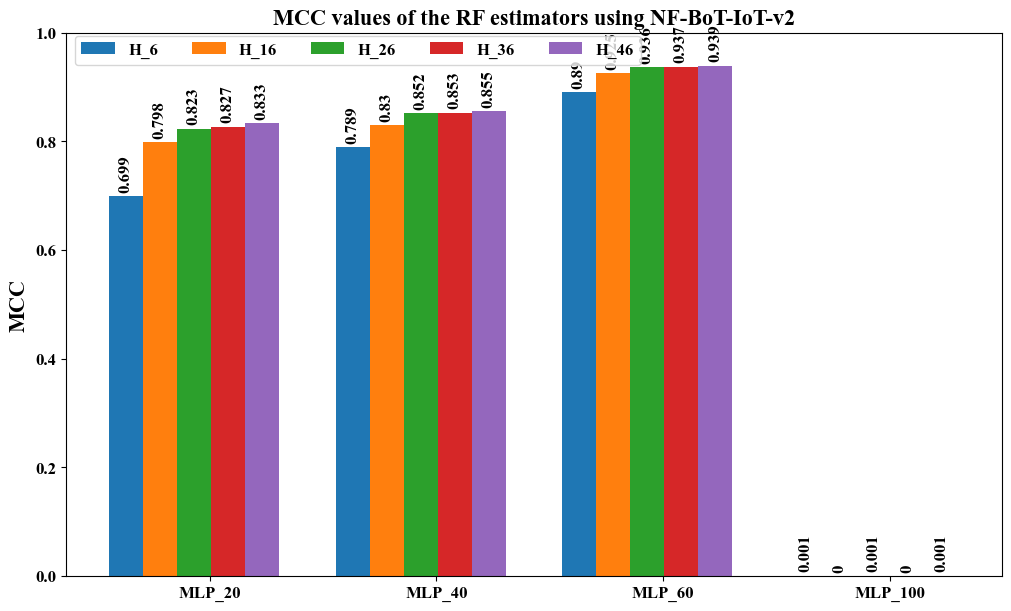

In [44]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('MLP_20', 'MLP_40', 'MLP_60', 'MLP_100')
penguin_means = {
    'H_6': hidden_6_values,
    'H_16': hidden_16_values,
    'H_26': hidden_26_values,
    'H_36': hidden_36_values,
    'H_46': hidden_46_values
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.22, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0, 1)

plt.show()

In [154]:
# List of keys to keep
keys_to_keep = ['XB_A_C_20','XB_A_M_20', 'XB_A_C_40','XB_A_M_40', 'XB_A_C_60',   'XB_A_M_60','XB_X']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values('n_estimators') for key in keys_to_keep if key in my_result_mean}


estimators_5 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==5] for key  in filtered_dict.keys()]
estimators_20 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==20] for key  in filtered_dict.keys()]
estimators_40 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==40] for key  in filtered_dict.keys()]
estimators_70 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==70] for key  in filtered_dict.keys()]
estimators_100 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==100] for key  in filtered_dict.keys()]


estimators_5_values = [float("{:.3f}".format(val[0])) for val in estimators_5]
estimators_20_values = [float("{:.3f}".format(val[0])) for val in estimators_20]
estimators_40_values = [float("{:.3f}".format(val[0])) for val in estimators_40]
estimators_70_values = [float("{:.3f}".format(val[0])) for val in estimators_70]
estimators_100_values = [float("{:.3f}".format(val[0])) for val in estimators_100]

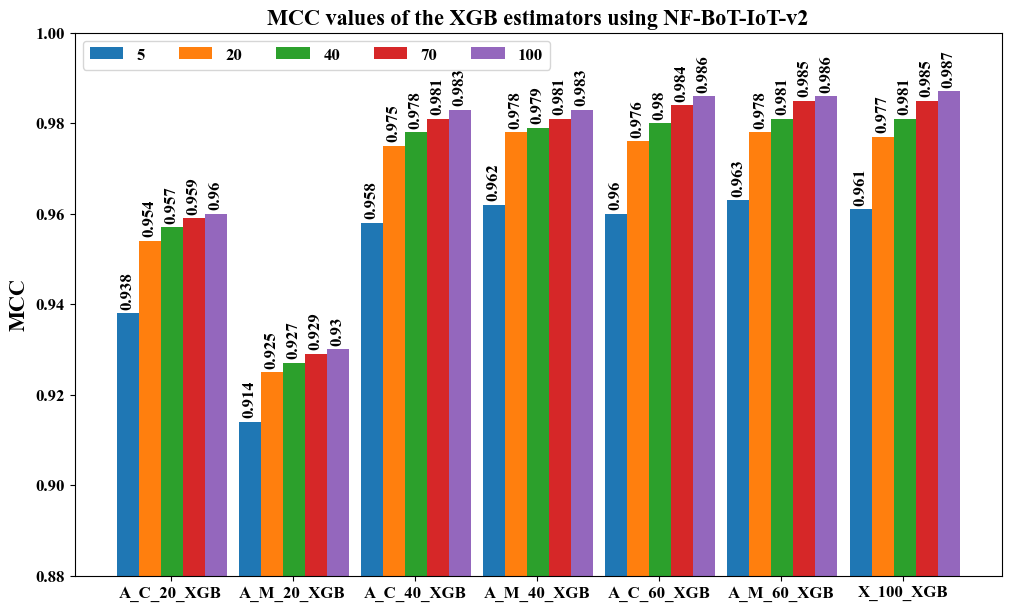

In [155]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('A_C_20_XGB','A_M_20_XGB', 'A_C_40_XGB','A_M_40_XGB', 'A_C_60_XGB',   'A_M_60_XGB','X_100_XGB')
penguin_means = {
    '5': estimators_5_values,
    '20': estimators_20_values,
    '40': estimators_40_values,
    '70': estimators_70_values,
    '100': estimators_100_values
}

x = np.arange(len(species))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the XGB estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.17, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.001))
ax.set_ylim(0.88, 1)

plt.show()

### Decision Tree

In [180]:
from os import listdir
from os.path import isfile, join

mypath_DT = "result_ton_bin/DT_with_ccp"
my_files_DT = [f for f in listdir(mypath_DT) if isfile(join(mypath_DT, f))]

In [181]:
import json
import pandas as pd

my_result_mean_DT = {}
for f in my_files_DT:
  path_file = join(mypath_DT, f)
  k,v = convert(path_file)
  my_result_mean_DT[k] = v

In [182]:
my_result_mean_DT.keys()

dict_keys(['DT_X', 'DT_A_C_20', 'DT_A_C_40', 'DT_A_C_60', 'DT_A_M_20', 'DT_A_M_40', 'DT_A_M_60'])

In [183]:
my_list = ['DT_A_C_20', 'DT_A_M_20', 'DT_A_C_40', 'DT_A_M_40', 'DT_A_C_60', 'DT_A_M_60', 'DT_X']

dfs = []
for k in my_list:
    dfs.append(my_result_mean_DT[k])

results_DT = pd.concat(dfs)

results_DT

,Algo,MCC,Kappa
0,DT_A_C_20,0.877715,0.877542
0,DT_A_M_20,0.833671,0.833048
0,DT_A_C_40,0.894394,0.890977
0,DT_A_M_40,0.908071,0.905667
0,DT_A_C_60,0.896553,0.893303
0,DT_A_M_60,0.909629,0.907176
0,DT_X,0.889366,0.884168


In [179]:
results_DT

,Algo,MCC,Kappa
0,DT_A_C_20,0.957357,0.957343
0,DT_A_M_20,0.930546,0.929832
0,DT_A_C_40,0.985176,0.985165
0,DT_A_M_40,0.984489,0.984477
0,DT_A_C_60,0.989609,0.989608
0,DT_A_M_60,0.990092,0.990090
0,DT_X,0.989608,0.989606
